<a href="https://colab.research.google.com/github/amit6604/Scikit-Learn-Tutorials/blob/master/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [22]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amitsh6604","key":"57f0772884d4be5d30bfa6408711fcde"}'}

In [23]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [25]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
therohk/ireland-historical-news                           The Irish Times - Waxy-Wany News                   47MB  2019-08-24 15:36:54           1504  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45          14373  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           7679  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                 94MB  2019-08-30 00:09:59           5815  
r3w0p4/bournemouth-venues                                 Venues in Bournemouth         

In [28]:
!kaggle datasets list -s house-prices-advanced-regression-techniques

ref                                                   title                                               size  lastUpdated          downloadCount  
----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
ngee379k/house-prices-advanced-regression-techniques  House Prices: Advanced Regression Techniques        94KB  2018-02-12 20:44:07            375  
bjaton/housepricesadvancedregressiontechniquestrain   house-prices-advanced-regression-techniques-train   94KB  2018-01-04 23:54:46            270  
lespin/house-prices-dataset                           House Prices dataset                               199KB  2018-02-18 20:39:04           1028  


In [30]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.5MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 63.5MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.3MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.5MB/s]


In [38]:
import numpy as np
import pandas as pd

import os 

for dirname, _, filenames in os.walk('/content'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/test.csv
/content/kaggle (1).json
/content/data_description.txt
/content/kaggle.json
/content/sample_submission.csv
/content/train.csv
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.metricsUUID
/content/.config/configurations/config_default
/content/.config/logs/2019.08.27/16.17.21.663235.log
/content/.config/logs/2019.08.27/16.17.22.686467.log
/content/.config/logs/2019.08.27/16.17.00.530950.log
/content/.config/logs/2019.08.27/16.17.17.407104.log
/content/.config/logs/2019.08.27/16.17.07.367707.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [40]:
print(train.shape, test.shape, submission.shape)

(1460, 81) (1459, 80) (1459, 2)


In [44]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
  pass

warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

train.head(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [0]:
train.drop('Id', axis = 1, inplace=True)
test.drop('Id', axis = 1, inplace=True)


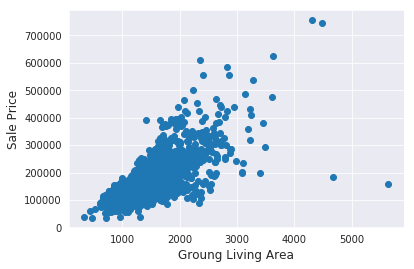

In [46]:
fig, ax = plt.subplots()
ax.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.ylabel("Sale Price", fontsize=12)
plt.xlabel("Groung Living Area", fontsize = 12)
plt.show()

In [0]:
train.drop(train[(train.GrLivArea>4000) & (train.GrLivArea<300000)].index, inplace=True)

In [52]:
train.shape

(1456, 80)

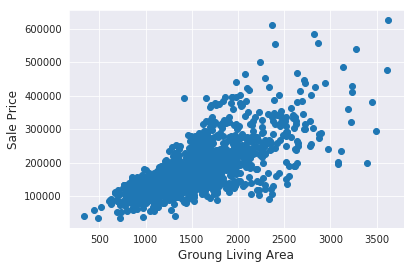

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.ylabel("Sale Price", fontsize=12)
plt.xlabel("Groung Living Area", fontsize = 12)
plt.show()


 mu = $ 180151.23 and sigma = 76670.25



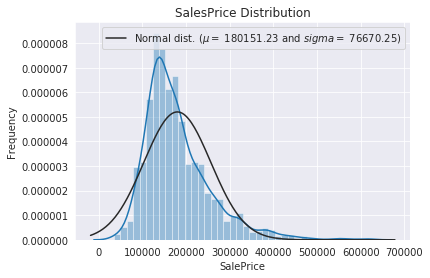

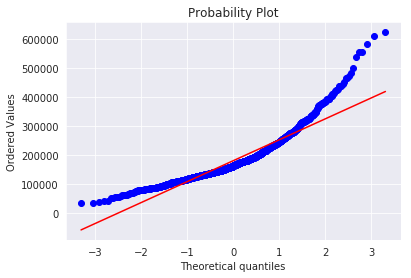

In [63]:
sns.distplot(train.SalePrice, fit=norm)

mu, sigma = norm.fit(train.SalePrice)
print('\n mu = $ {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu =  $ {:.2f} and $sigma = $ {:.2f})'.format(mu, sigma)], loc = 'best')

plt.ylabel("Frequency")
plt.title("SalesPrice Distribution")

fig = plt.figure()
res = stats.probplot(train.SalePrice, plot = plt)
plt.show()


 mu = $ 2.57 and sigma = 0.03



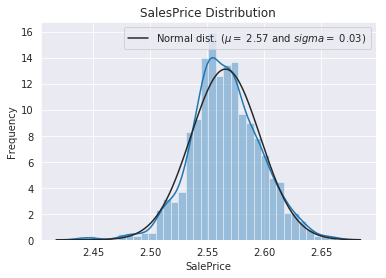

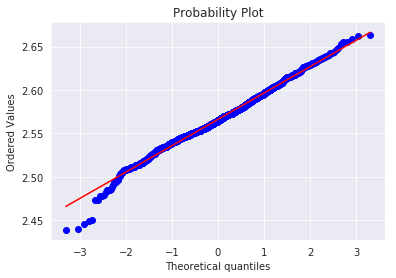

In [68]:
train.SalePrice = np.log1p(train['SalePrice'])
sns.distplot(train.SalePrice, fit=norm)

mu, sigma = norm.fit(train.SalePrice)
print('\n mu = $ {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu =  $ {:.2f} and $sigma = $ {:.2f})'.format(mu, sigma)], loc = 'best')

plt.ylabel("Frequency")
plt.title("SalesPrice Distribution")

fig = plt.figure()
res = stats.probplot(train.SalePrice, plot = plt)
plt.show()

In [70]:
Data = pd.concat((train, test)).reset_index(drop=True)
Data.shape

(2915, 80)

In [73]:
null_data = Data.isnull().sum() / len(Data) * 100
null_data = null_data.drop(null_data[null_data==0].index)
null_data

Alley          93.208
BsmtCond        2.813
BsmtExposure    2.813
BsmtFinSF1      0.034
BsmtFinSF2      0.034
BsmtFinType1    2.710
BsmtFinType2    2.744
BsmtFullBath    0.069
BsmtHalfBath    0.069
BsmtQual        2.779
BsmtUnfSF       0.034
Electrical      0.034
Exterior1st     0.034
Exterior2nd     0.034
Fence          80.446
FireplaceQu    48.714
Functional      0.069
GarageArea      0.034
GarageCars      0.034
GarageCond      5.455
GarageFinish    5.455
GarageQual      5.455
GarageType      5.386
GarageYrBlt     5.455
KitchenQual     0.034
LotFrontage    16.672
MSZoning        0.137
MasVnrArea      0.789
MasVnrType      0.823
MiscFeature    96.398
PoolQC         99.726
SalePrice      50.051
SaleType        0.034
TotalBsmtSF     0.034
Utilities       0.069
dtype: float64

In [74]:
null_data.index

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')

Text(0.5, 1.0, 'Percent misssing data by features')

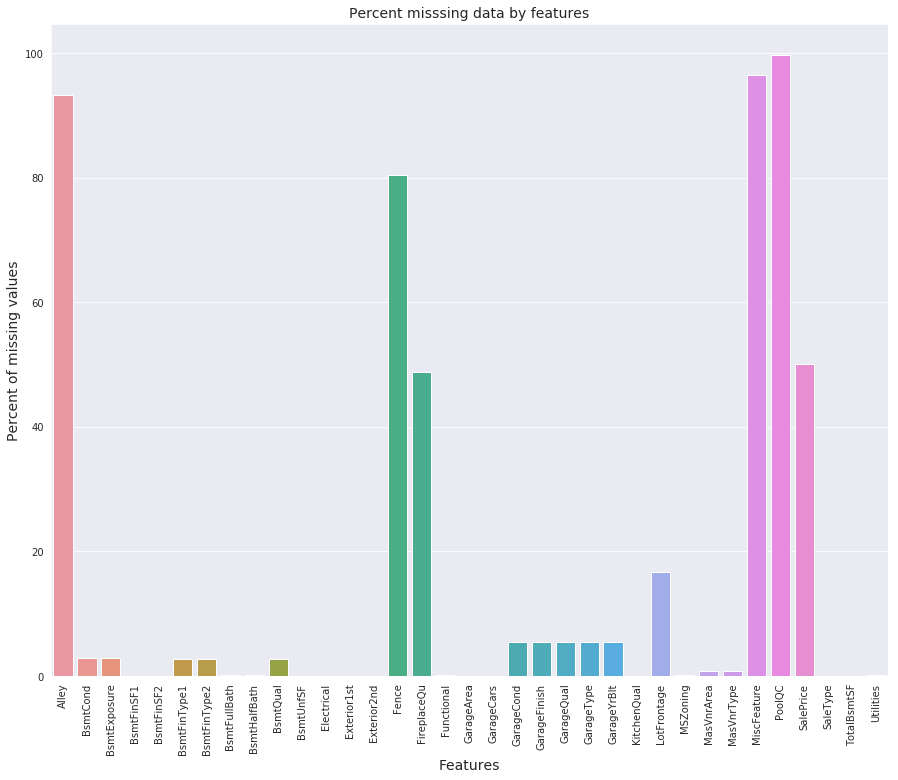

In [77]:
f , ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation = 90)
sns.barplot(x = null_data.index, y = null_data)
plt.xlabel("Features", fontsize = 14)
plt.ylabel("Percent of missing values", fontsize = 14)
plt.title("Percent misssing data by features", fontsize = 14)


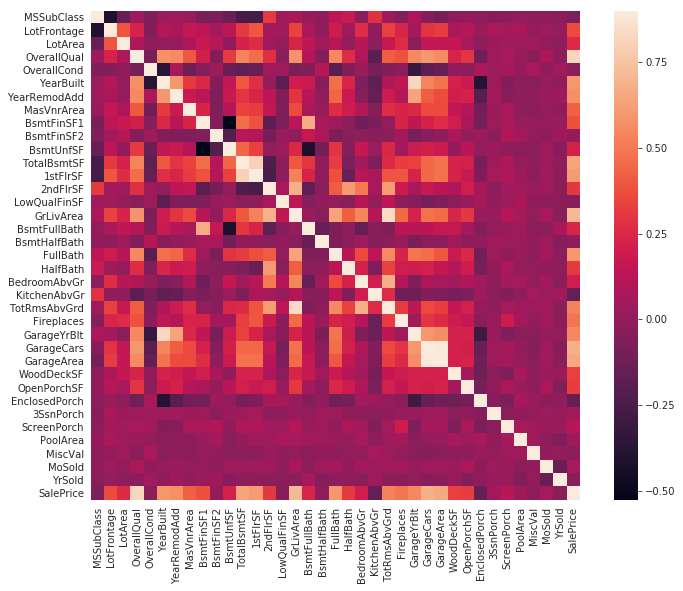

In [78]:
cormatrix = train.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(cormatrix, vmax = 0.9, square = True)

In [80]:
cormatrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.409,-0.142,0.032,-0.059,0.028,0.040,0.023,-0.075,-0.066,-0.141,-0.255,-0.265,0.311,0.046,0.078,0.003,-0.003,0.132,0.177,-0.024,0.282,0.040,-0.046,0.085,-0.040,-0.100,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.073
LotFrontage,-0.409,1.000,0.388,0.226,-0.056,0.114,0.080,0.162,0.134,0.057,0.142,0.313,0.398,0.050,0.043,0.341,0.075,-0.009,0.187,0.037,0.270,-0.003,0.330,0.238,0.058,0.289,0.319,0.077,0.116,0.017,0.076,0.048,0.075,0.006,0.028,0.011,0.362
LotArea,-0.142,0.388,1.000,0.089,-0.003,0.007,0.007,0.081,0.173,0.115,-0.004,0.222,0.268,0.037,0.006,0.232,0.148,0.047,0.117,0.006,0.119,-0.017,0.174,0.260,-0.033,0.151,0.162,0.167,0.062,-0.016,0.022,0.046,0.034,0.039,0.007,-0.013,0.257
OverallQual,0.032,0.226,0.089,1.000,-0.091,0.572,0.551,0.400,0.213,-0.058,0.310,0.533,0.462,0.280,-0.030,0.584,0.104,-0.047,0.544,0.267,0.097,-0.184,0.416,0.387,0.547,0.599,0.555,0.233,0.298,-0.112,0.032,0.068,0.018,-0.031,0.076,-0.024,0.817
OverallCond,-0.059,-0.056,-0.003,-0.091,1.000,-0.376,0.075,-0.130,-0.043,0.040,-0.137,-0.176,-0.146,0.031,0.025,-0.079,-0.053,0.117,-0.194,-0.060,0.013,-0.087,-0.056,-0.022,-0.324,-0.185,-0.151,-0.003,-0.030,0.070,0.025,0.055,0.008,0.069,-0.003,0.044,-0.032
YearBuilt,0.028,0.114,0.007,0.572,-0.376,1.000,0.592,0.314,0.248,-0.048,0.149,0.400,0.280,0.003,-0.184,0.193,0.185,-0.040,0.467,0.240,-0.073,-0.174,0.089,0.143,0.825,0.537,0.477,0.223,0.184,-0.387,0.032,-0.050,-0.014,-0.034,0.014,-0.013,0.590
YearRemodAdd,0.040,0.080,0.007,0.551,0.075,0.592,1.000,0.176,0.122,-0.067,0.181,0.295,0.238,0.136,-0.062,0.289,0.117,-0.013,0.438,0.181,-0.042,-0.149,0.188,0.109,0.641,0.420,0.370,0.204,0.223,-0.193,0.046,-0.038,-0.009,-0.010,0.023,0.037,0.570
MasVnrArea,0.023,0.162,0.081,0.400,-0.130,0.314,0.176,1.000,0.236,-0.071,0.112,0.338,0.317,0.157,-0.070,0.363,0.080,0.012,0.266,0.195,0.099,-0.037,0.265,0.237,0.250,0.362,0.362,0.149,0.106,-0.109,0.020,0.065,-0.016,-0.030,0.004,-0.005,0.425
BsmtFinSF1,-0.075,0.134,0.173,0.213,-0.043,0.248,0.122,0.236,1.000,-0.049,-0.526,0.460,0.386,-0.183,-0.067,0.121,0.662,0.069,0.037,-0.015,-0.122,-0.083,0.002,0.236,0.147,0.224,0.269,0.201,0.072,-0.103,0.030,0.070,0.016,0.005,-0.002,0.019,0.380
BsmtFinSF2,-0.066,0.057,0.115,-0.058,0.040,-0.048,-0.067,-0.071,-0.049,1.000,-0.209,0.116,0.106,-0.098,0.015,-0.005,0.160,0.072,-0.075,-0.031,-0.015,-0.041,-0.033,0.049,-0.087,-0.037,-0.016,0.069,0.005,0.036,-0.030,0.089,0.053,0.005,-0.016,0.031,0.008


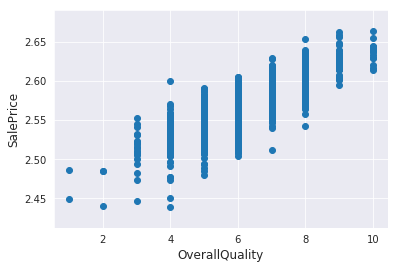

In [81]:
fig, ax  = plt.subplots()
ax.scatter(x = train.OverallQual, y = train.SalePrice)
plt.ylabel('SalePrice', fontsize = 12)
plt.xlabel('OverallQuality', fontsize = 12)
plt.show()

In [83]:
Data.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [0]:
Data.PoolQC.fillna('None', inplace = True)

In [86]:
Data.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [87]:
Data.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [88]:
Data.MiscFeature.fillna('None', inplace = True)
Data.MiscFeature.unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [90]:
Data.Alley.fillna('None', inplace = True)
Data.Fence.fillna('None', inplace = True)
Data.FireplaceQu.fillna('None', inplace = True)
Data.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [0]:
Data.Alley.fillna('None', inplace = True)


In [0]:
Data.LotFrontage = Data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    Data[col] = Data[col].fillna('None')

In [0]:
for col in ('GarageYrBlt', 
            'GarageArea', 
            'GarageCars',
            'BsmtFinSF1', 
            'BsmtFinSF2', 
            'BsmtUnfSF',
            'TotalBsmtSF', 
            'BsmtFullBath', 
            'BsmtHalfBath'):
  Data[col] = Data[col].fillna(0)

In [99]:
Data.Electrical.mode()

0    SBrkr
dtype: object

In [0]:
Data['Electrical'].fillna(Data['Electrical'].mode())
Data['SaleType'] = Data['SaleType'].fillna(Data['SaleType'].mode()[0])
Data['Exterior1st'] = Data['Exterior1st'].fillna(Data['Exterior1st'].mode()[0])
Data['Exterior2nd'] = Data['Exterior2nd'].fillna(Data['Exterior2nd'].mode()[0])
Data['KitchenQual'] = Data['KitchenQual'].fillna(Data['KitchenQual'].mode()[0])
Data['Electrical'] = Data['Electrical'].fillna(Data['Electrical'].mode()[0])
Data["Functional"] = Data["Functional"].fillna("Typ")
Data = Data.drop(['Utilities'], axis=1)
Data['MSZoning'] = Data['MSZoning'].fillna(Data['MSZoning'].mode()[0])
Data["MasVnrType"] = Data["MasVnrType"].fillna("None")
Data["MasVnrArea"] = Data["MasVnrArea"].fillna(0)

In [0]:
Data.MSSubClass.fillna('None', inplace = True)

In [104]:
null_data = Data.isnull().sum() / len(Data)
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null_data})
missing_data

,Missing Ratio
SalePrice,0.501
BsmtExposure,0.028
BsmtCond,0.028
BsmtQual,0.028
BsmtFinType2,0.027
BsmtFinType1,0.027


In [105]:
null_data

SalePrice      0.501
BsmtExposure   0.028
BsmtCond       0.028
BsmtQual       0.028
BsmtFinType2   0.027
BsmtFinType1   0.027
dtype: float64